In [ ]:
K Means Clustering

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons

In [22]:
df = pd.read_csv(r"https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df.drop(columns=['variety'], inplace = True)
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss = []

for i in range(2,21):
    km = KMeans(n_clusters =i, init = 'k-means++')
    km.fit(df)
    wcss.append(km.inertia_)

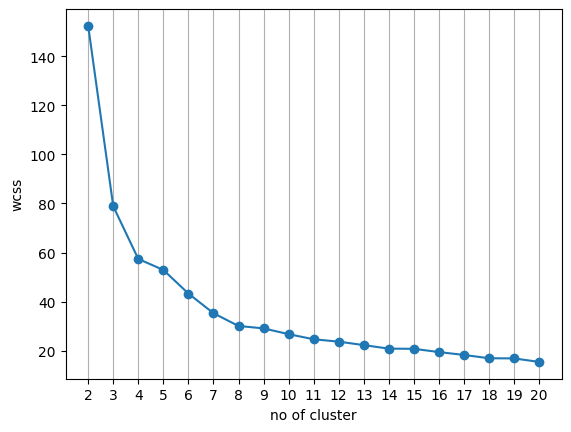

In [57]:
plt.plot([i for i in range(2,21)], wcss, marker = 'o')
plt.xlabel('no of cluster')
plt.xticks([i for i in range(2,21)])
plt.ylabel('wcss')
plt.grid(axis = 'x')
plt.show()

In [26]:
knn = KMeans(n_clusters = 3)
df['predict']=knn.fit_predict(df)

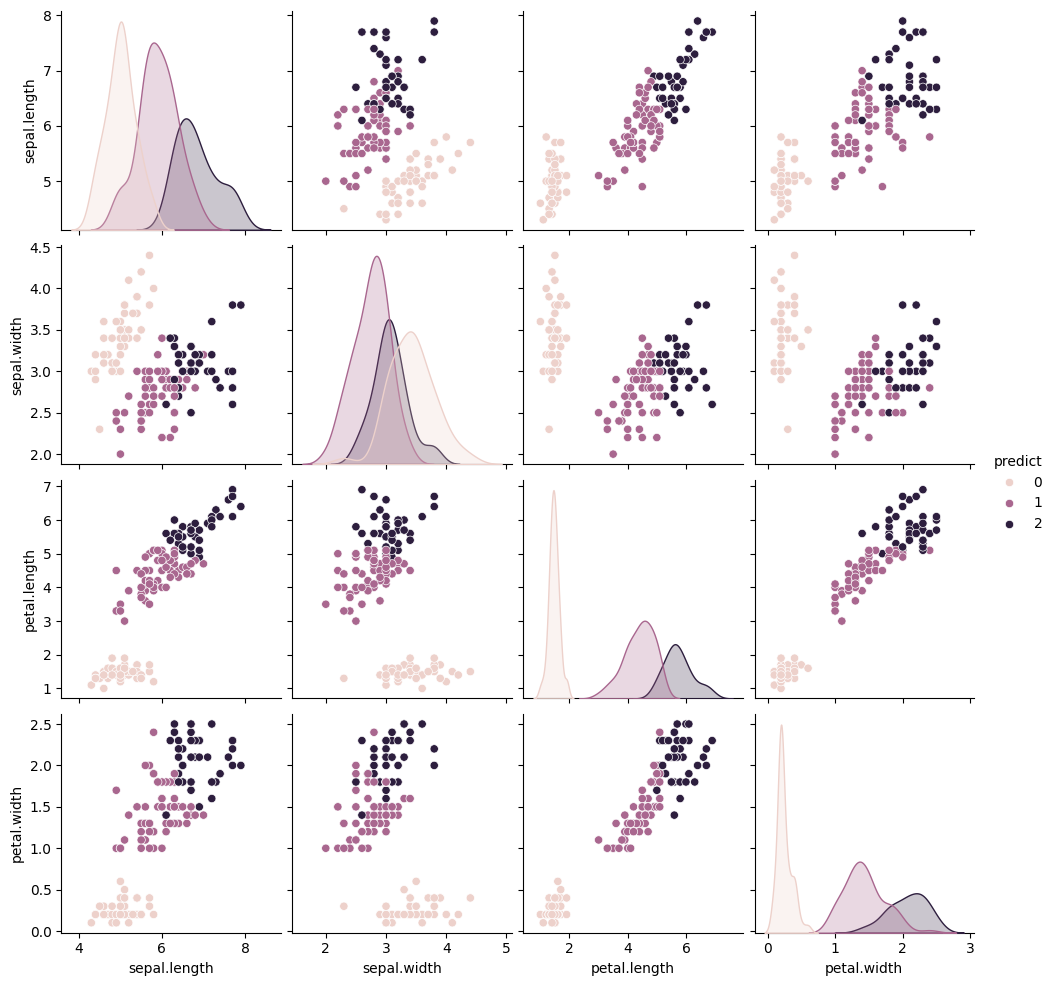

In [27]:
sns.pairplot(data=df, hue = 'predict')
plt.savefig('predict.jpg')
plt.show()

In [28]:
df

,sepal.length,sepal.width,petal.length,petal.width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
Hierarchical Clustering

In [ ]:
AGGLOMERATIVE Hierarchical

In [10]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [11]:
import scipy.cluster.hierarchy as sc

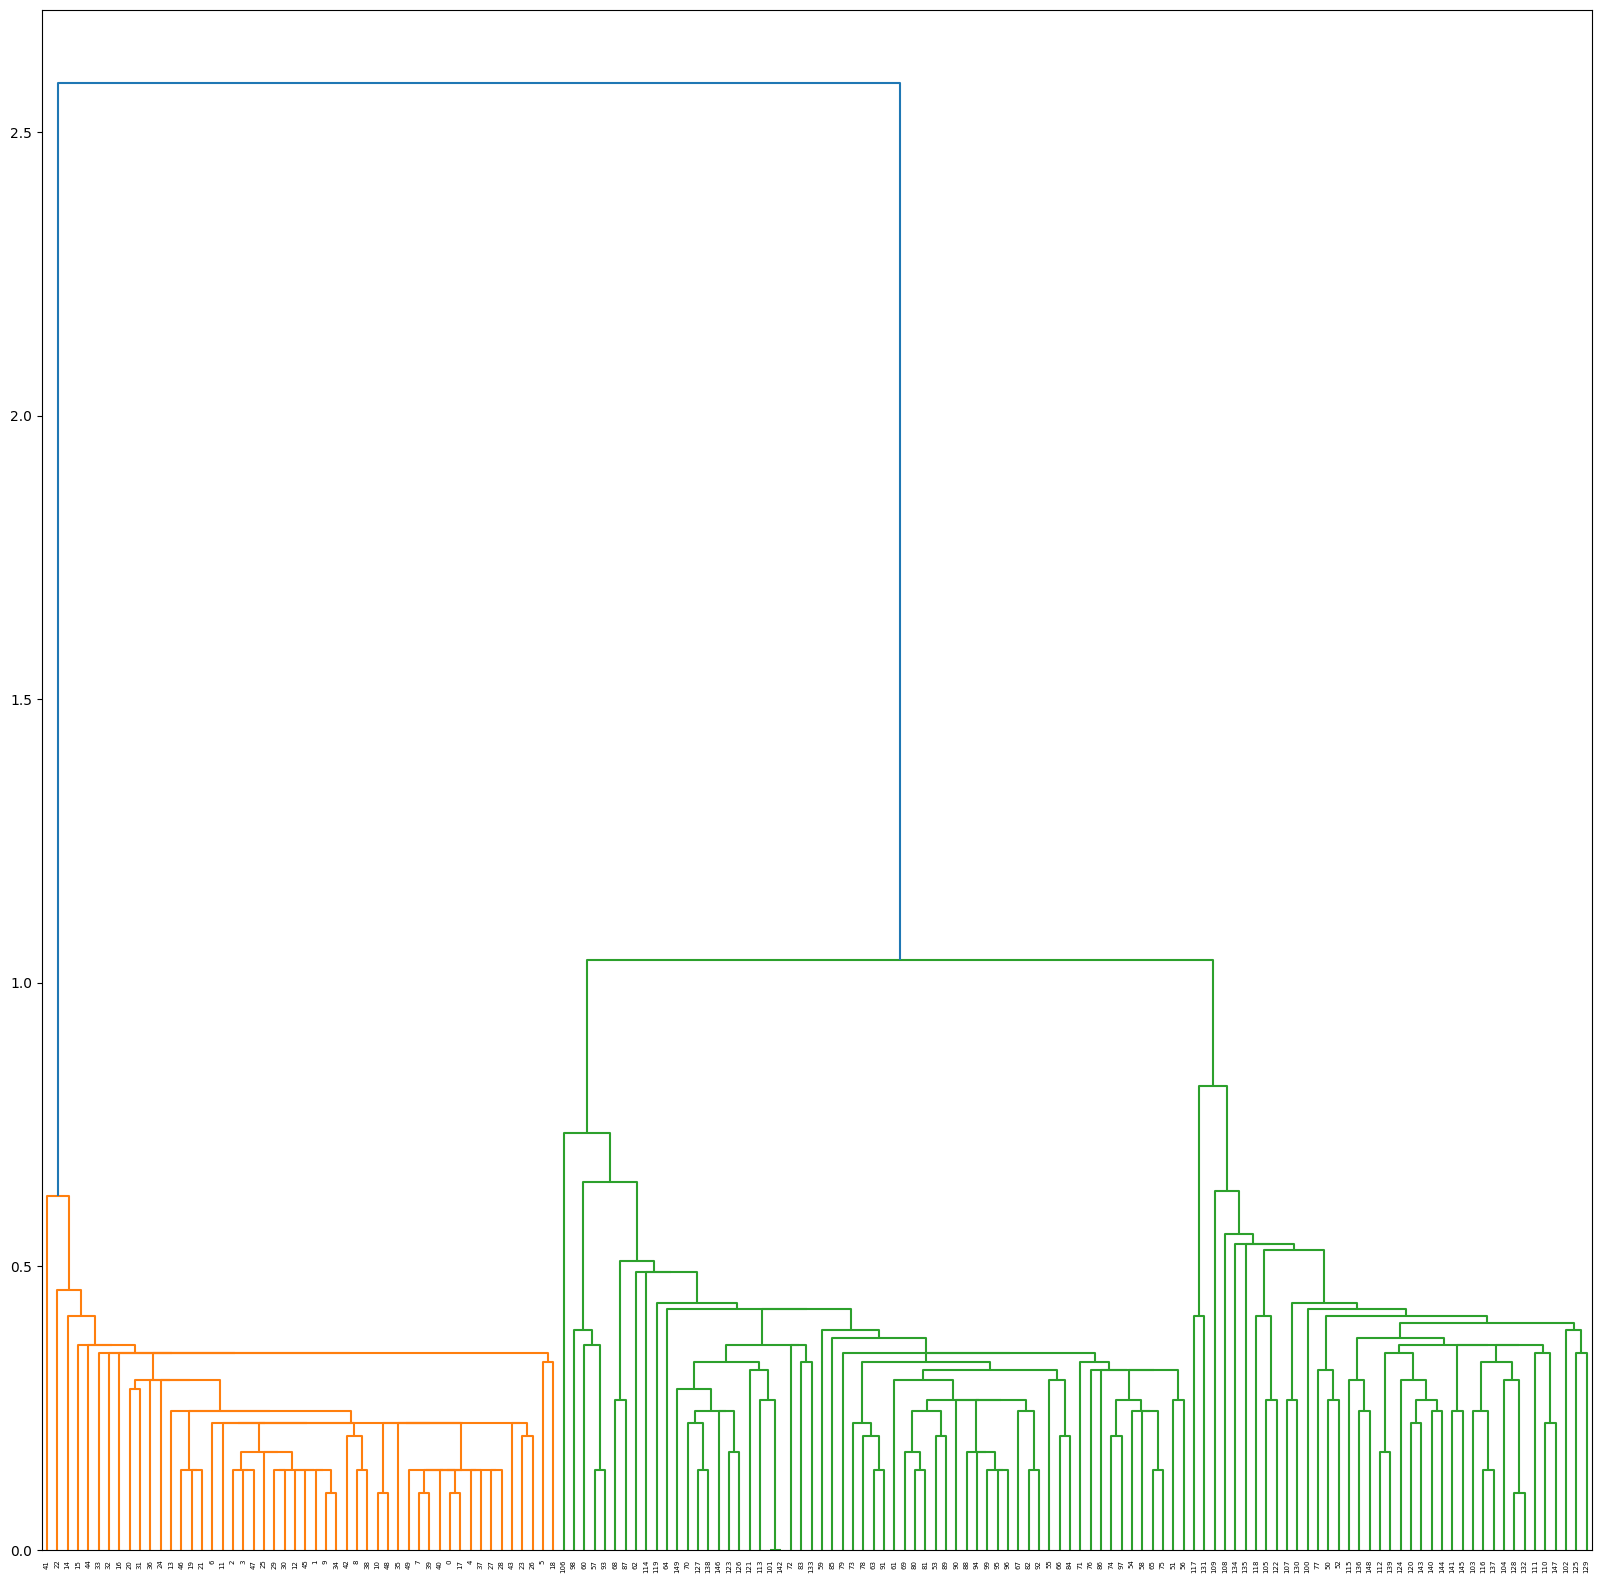

In [15]:
plt.figure(figsize=(20,20))
sc.dendrogram(sc.linkage(df, method = 'single', metric = 'euclidean'))
plt.savefig('demo1.jpg')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
ac = AgglomerativeClustering(n_clusters=2, linkage = 'single')
df['Predict'] = ac.fit_predict(df)

In [19]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,predict,Predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


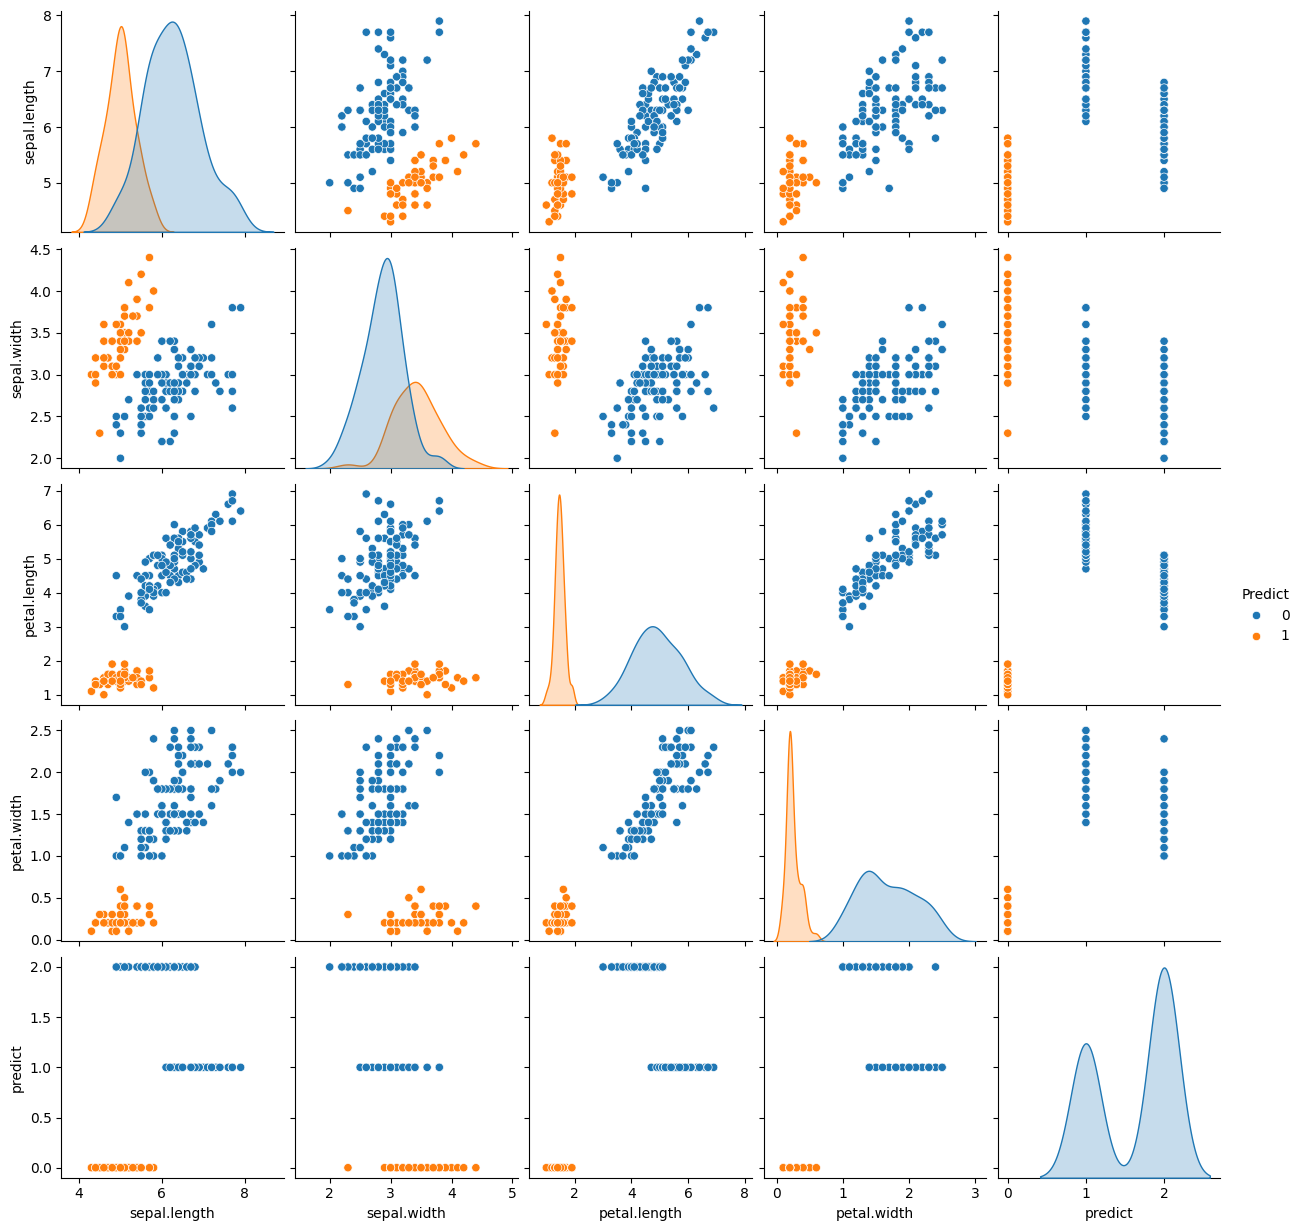

In [20]:
sns.pairplot(data = df, hue = 'Predict')
plt.show()

In [ ]:
DBSCAN Clustering Algorithm

In [29]:
x,y = make_moons(n_samples = 250, noise =0.05)

In [46]:
df1 = {"data1": x[:,0], "data2":x[:,1]}

In [47]:
dataset = pd.DataFrame(df1)

In [48]:
dataset.head(2)

,data1,data2
0,0.201434,-0.142268
1,-0.624306,0.745936


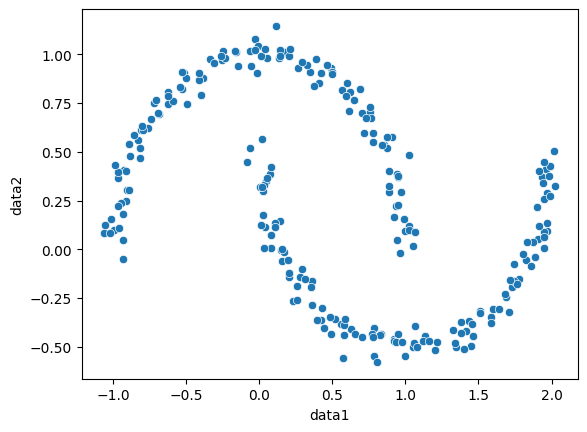

In [49]:
sns.scatterplot(x='data1', y ='data2', data = dataset)
plt.show()

In [50]:
dataset.head(3)

,data1,data2
0,0.201434,-0.142268
1,-0.624306,0.745936
2,0.852279,0.533813


In [45]:
from sklearn.cluster import DBSCAN

In [52]:
db = DBSCAN(eps = 0.2, min_samples = 5)
dataset['Predict'] = db.fit_predict(dataset)

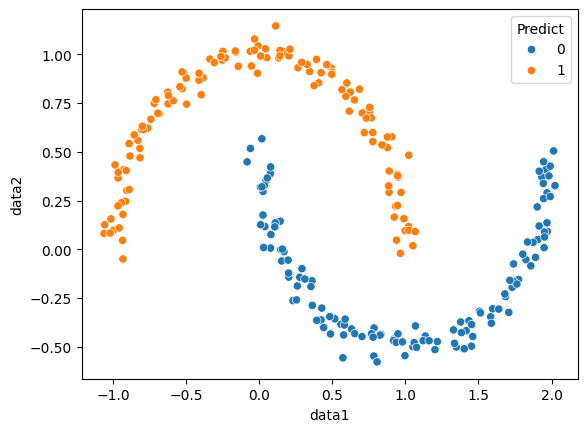

In [53]:
sns.scatterplot(x='data1', y ='data2', data = dataset, hue='Predict')
plt.show()

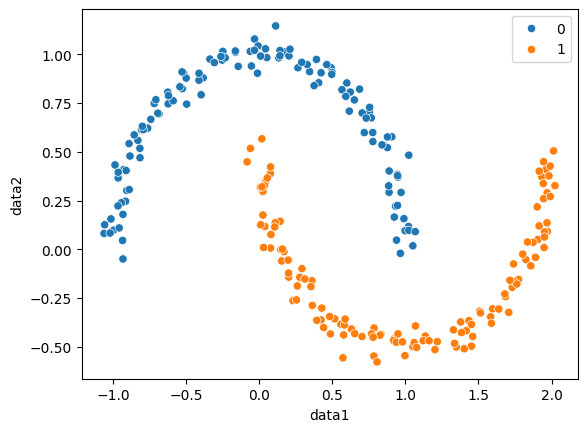

In [55]:
sns.scatterplot(x='data1', y ='data2', data = dataset, hue=y)
plt.show()

In [ ]:
SILHOUETTE SCORE